> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Factors affect whether patients show up for scheduled appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

The purpose of the analysis is to explore the factors that are important for predicting if a patient show up for their scheduled appointment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import seaborn as sns

sns.set(style="ticks", color_codes=True)

% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [9]:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [3]:
df = df.drop(99832)

In [4]:
# change colunm names
df.rename(columns = lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.rename(columns = {'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns = {'appointmentday': 'appointment_day'}, inplace=True)
df.rename(columns = {'neighbourhood': 'hospital_location'}, inplace=True)
df.rename(columns = {'scholarship': 'welfare_enrolled'}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# change data type from 'str' to 'datetime'
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [6]:
# change the value of 'no_show' column from 'yes / no' to '1 / 0'
df['showup'] = pd.get_dummies(df['no_show'])['No']

In [7]:
df['female'] = pd.get_dummies(df['gender'])['F']

In [8]:
# calculate waiting time
df['waiting_time'] = df['appointment_day'] + datetime.timedelta(hours=24) - df['scheduled_day']

In [9]:
# put waiting time into days
df['waiting_days'] = df['waiting_time']  / np.timedelta64(1, 'D')

In [10]:
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,showup,female,waiting_time,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1,05:21:52,0.223519
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,07:51:33,0.327465
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,1,07:40:56,0.320093
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,1,06:30:29,0.271169
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1,07:52:37,0.328206


In [11]:
df['hospital_location'].nunique()

81

In [11]:
df2 = df.drop(['patientid', 'appointmentid', 'gender', 'scheduled_day', 'appointment_day', 'no_show', 'waiting_time'], axis=1)
df2.head()

,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,showup,female,waiting_days
0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1,0.223519
1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0.327465
2,62,MATA DA PRAIA,0,0,0,0,0,0,1,1,0.320093
3,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,1,0.271169
4,56,JARDIM DA PENHA,0,1,1,0,0,0,1,1,0.328206


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


#### Gender

e:\Users\linjing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The relationship between show up rate and gender')

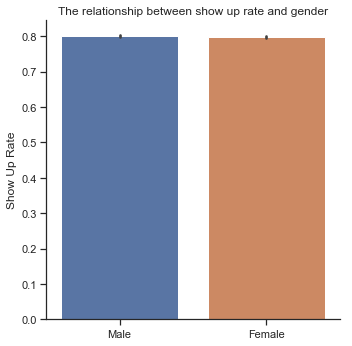

In [14]:
g = sns.catplot(x="female", y="showup", kind="bar", data=df2)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["Male", "Female"])) 

plt.title('The relationship between show up rate and gender')

No gender differences could be seen from the graph.

#### Welfare

e:\Users\linjing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The relationship between show up rate and welfare')

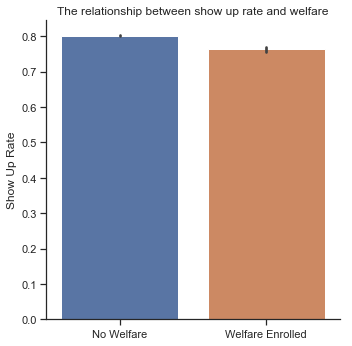

In [24]:
g = sns.catplot(x="welfare_enrolled", y="showup", kind="bar", data=df2)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No Welfare", "Welfare Enrolled"])) 

plt.title('The relationship between show up rate and welfare')

People enrolled in welfare has a lower show up rate.

#### SMS

e:\Users\linjing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The relationship between show up rate and sms')

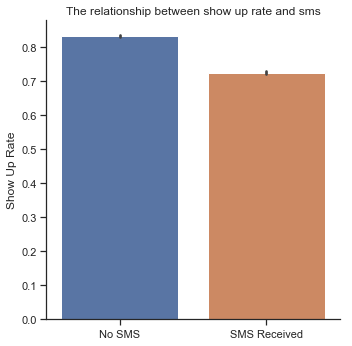

In [25]:
g = sns.catplot(x="sms_received", y="showup", kind="bar", data=df2)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No SMS", "SMS Received"])) 

plt.title('The relationship between show up rate and sms')

People received SMS has a lower show up rate.

#### Welfare and SMS

e:\Users\linjing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The relationship between show up rate, welfare and sms')

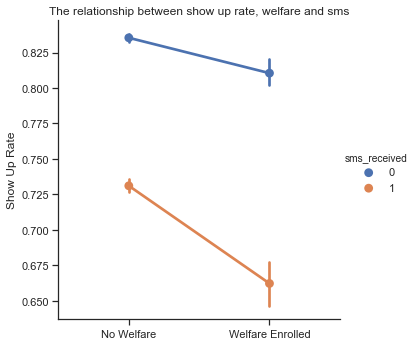

In [27]:
g = sns.catplot(x="welfare_enrolled", y="showup", hue="sms_received", kind="point", data=df2)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No Welfare", "Welfare Enrolled"])) 

plt.title('The relationship between show up rate, welfare and sms')


For people who received SMS, they have a lower show up rate if enrolled in welfare. The situation is same for patients who did not get SMS.

e:\Users\linjing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The relationship between show up rate, welfare and sms')

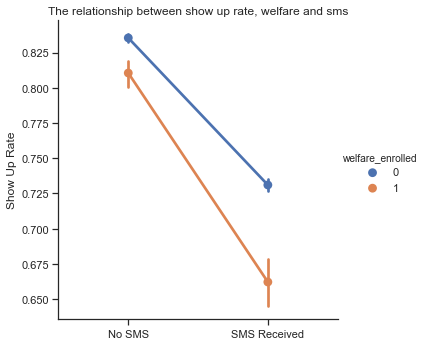

In [26]:
g = sns.catplot(x="sms_received", y="showup", hue="welfare_enrolled", kind="point", data=df2)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No SMS", "SMS Received"])) 

plt.title('The relationship between show up rate, welfare and sms')

For people who were enrolled in welfare, they have a lower show up rate if receiving SMS. The situation is same for patients who did not have welfare.

#### Waiting Days

Text(0.5,1,'The relationship between show up rate and waiting days')

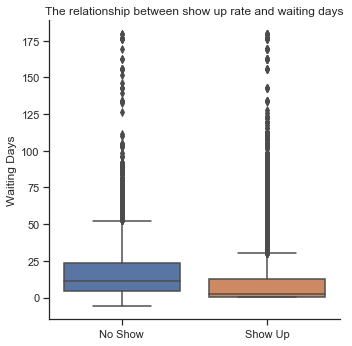

In [16]:
g = sns.catplot(x="showup", y="waiting_days", kind="box", data=df2)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate and waiting days')

Those who show up for the appointment has a shorter waiting period. 

In [ ]:
g = sns.catplot(x="showup", y="waiting_days", kind="violin", inner=None, data=df2)
sns.swarmplot(x="showup", y="waiting_days", color="k", size=3, data=df2, ax=g.ax);


#### Waiting Days and Welfare

Text(0.5,1,'The relationship between show up, waiting days and welfare')

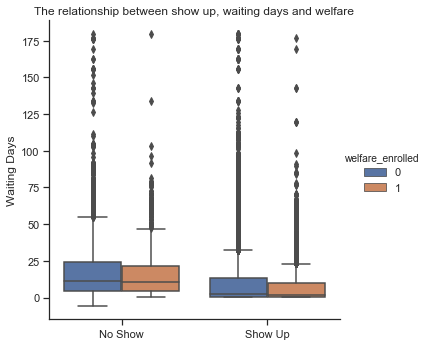

In [18]:
g = sns.catplot(x="showup", y="waiting_days", hue="welfare_enrolled", kind="box", data=df2)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, waiting days and welfare')

For people either enrolled in welfare or not, those who show up for their appointment have a shorter waiting time after booking.

#### Waiting Days and SMS

Text(0.5,1,'The relationship between show up, waiting days and SMS received')

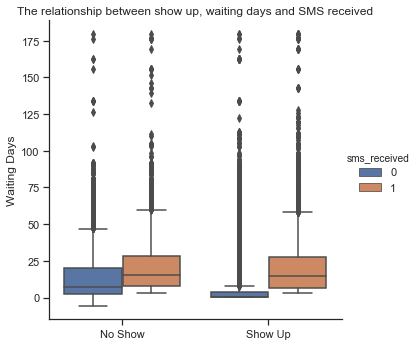

In [19]:
g = sns.catplot(x="showup", y="waiting_days", hue="sms_received", kind="box", data=df2)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, waiting days and SMS received')

For people who did not receive SMS, there is a shorter waiting time before they arrived  for their appointment. But no obvious differences could be seen for those received SMS.

#### Age

Text(0.5,1,'The relationship between show up rate and age')

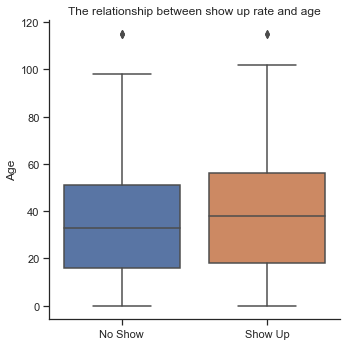

In [20]:
g = sns.catplot(x="showup", y="age", kind="box", data=df2)

(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate and age')

The average age of the patients showed up is a bit higher.

#### Age and SMS

Text(0.5,1,'The relationship between show up rate, age and SMS received')

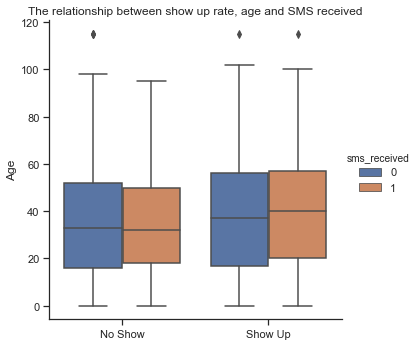

In [21]:
g = sns.catplot(x="showup", y="age", hue="sms_received", kind="box", data=df2)
(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate, age and SMS received')

For people either receivd SMS or not, the average age of those who show up for the appointment is higher.

#### Age and Welfare

Text(0.5,1,'The relationship between show up, age and welfare')

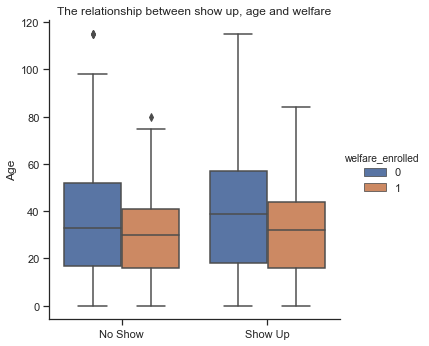

In [23]:
g = sns.catplot(x="showup", y="age", hue="welfare_enrolled", kind="box", data=df2)

(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, age and welfare')

If we divide people by enrolled in welfare or not, the average of people show up for appointment is a bit higher than no show people.


### Research Question 1

### Discuss the relationship between waiting days and show up rates

In [19]:
df2['intercept'] = 1

In [20]:
lm = sm.Logit(df2['showup'], df2[['intercept', 'waiting_days']])
results = lm.fit()
results.summary()

e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 5


e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110526
Model:                          Logit   Df Residuals:                   110524
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:                     inf
Time:                        19:45:47   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.6906      0.010    173.788      0.000       1.672       1.710
waiting_days    -0.0258      0.000    -57.394      0.000      -0.027      -0.025
================================================================================
"""

In [22]:
1 / np.exp(results.params)

intercept       0.18440
waiting_days    1.02615
dtype: float64

**For each 1 day decrease in the waiting time, patient is 1.026 times likely to show up for their appointment (_P_ = 0.00 < 0.05).**

---

### Research Question 2  

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [23]:
lm = sm.Logit(df2['showup'], df2[['intercept', 'female', 'age', 'welfare_enrolled', 'sms_received', 'waiting_days']])
results = lm.fit()
results.summary()

e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110526
Model:                          Logit   Df Residuals:                   110520
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:                     inf
Time:                        19:46:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.5428      0.018     85.043      0.000       1.507       1.578
female              -0.0051      0.016     -0.311      0.756      -0.037       0.027
age                  0.0075      0.000     21.903      0.000       0.007       0.008
welfare_enrolled    -0.2340      0.025     -9.481      0.000      -0.282      -0.186
sms_received        -0.3524      0.017    -20.913      0.000      -0.385      -0.319
waiting_days        -0.0228      0.000    -47.011      0.000      -0.024      -0.022
====================================================================================
"""

In [24]:
np.exp(results.params)

intercept           4.677465
female              0.994927
age                 1.007503
welfare_enrolled    0.791353
sms_received        0.703000
waiting_days        0.977453
dtype: float64

In [25]:
1 / _

intercept           0.213791
female              1.005099
age                 0.992553
welfare_enrolled    1.263659
sms_received        1.422475
waiting_days        1.023067
dtype: float64

#### Result Analysis

+ **Gender** does not have a significant effect on the show up rate (_P_ = 0.757 > 0.05)

+ For every 1 year increase in **age**, the show up rate is 1.01 times as likely holding all else constant (_P_ = 0.00 < 0.05).

+ For every 1 day decrease in **waiting time**, the show up rate is 1.02 times as likely holding all else constant (_P_ = 0.00 < 0.05).

+ If patients did not receive **SMS**, the show up rate is 1.42 times than receving SMS, holding all else constant (_P_ = 0.00 < 0.05).

+ The show up rate of patients who were not enrolled in **Brasilian welfare program** Bolsa Família is 1.26 times more than those enrolled, holding all else constant (_P_ = 0.00 < 0.05).


---

### Confusion Matrix

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [32]:
y = df2['showup']
x = df[['welfare_enrolled', 'sms_received']]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42)

In [34]:
log_mod = LogisticRegression()

In [35]:
log_mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_predicts = log_mod.predict(x_test)

In [37]:
precision_score(y_test, y_predicts)

0.7986971862842667

In [38]:
recall_score(y_test, y_predicts)

1.0

In [39]:
accuracy_score(y_test, y_predicts)

0.7986971862842667

In [40]:
confusion_matrix(y_test, y_predicts)

array([[   0, 2225],
       [   0, 8828]], dtype=int64)

In [47]:
precision_score(y_test, y_predicts)

0.7987018923119115

n=110053| Actual No | Actual Yes
---------| -------------| -------------
Predicted No | 0| 2225
Predicted Yes | 0| 8828

We could use welfare enrolled and SMS received to predict whether a patient will show up for an appointment:
+ accuracy: 0.80,
+ sensitivity: 1.0,
+ precision: 0.80.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

# Findings

Age, waiting time, SMS received and welfare enrolled have a significant impact on predicting whether a patient will show up for the schedualed appointment, whereas **gender** does not (_P_ = 0.757 > 0.05).

+ For every 1 year increase in **age**, the show up rate is 1.01 times as likely holding all else constant (_P_ = 0.00 < 0.05).

+ For every 1 day decrease in **waiting time**, the show up rate is 1.02 times as likely holding all else constant (_P_ = 0.00 < 0.05).

+ If patients did not receive **SMS**, the show up rate is 1.42 times than receving SMS, holding all else constant (_P_ = 0.00 < 0.05).

+ The show up rate of patients who were not enrolled in **Brasilian welfare program** Bolsa Família is 1.26 times more than those enrolled, holding all else constant (_P_ = 0.00 < 0.05).

Thus, receiving SMS or welfare could be more important for predicting if a patient will show up for their scheduled appointment. 


When we use **welfare enrolled** and **SMS received** to predict whether a patient will show up for an appointment, the accuracy could reach 0.80, with the sensitivity of 1.0 and precision of 0.80.

